# データセット作成

## 【問題1】自作データセットでの分類の学習

自作のデータセットに対して分類問題を解いてください。

In [1]:
# ライブラリの準備

from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from keras import optimizers
from keras.preprocessing.image import load_img, img_to_array
from PIL import Image
import numpy as np
import os
import glob 
import re
import matplotlib.pyplot as plt
import cv2
%matplotlib inline

In [2]:
pwd

'/Users/daisuke_sato/kankyo/kankyo/diveintocode-ml/term_2/データセット作成'

- データを収集する
- データを整形（前処理）する
- 学習データを作成する
- 学習フェーズ（機械学習）
- 推論フェーズ（予測）

In [3]:
from keras.preprocessing.image import ImageDataGenerator

In [4]:
img_w=150
img_h=150

In [5]:
# 画像パス
path='./training_1'
image_path_list = glob.glob(path + '/*')# + ".jpeg") #\cat\*') + glob.glob(r'training\dog\*')

In [6]:
image_path_list

['./training_1/dog_1.jpeg',
 './training_1/cat_1.jpeg',
 './training_1/cat_2.jpeg',
 './training_1/dog_3.jpeg',
 './training_1/dog_2.jpeg',
 './training_1/cat_3.jpeg',
 './training_1/dog_5.jpeg',
 './training_1/cat_4.jpeg',
 './training_1/cat_5.jpeg',
 './training_1/dog_4.jpeg']

In [7]:
#　説明変数と目的変数を格納する配列を用意
X = []
y = []
# 画像をパスでループ
for image_path in image_path_list:
    # 正解ラベルを格納
    # findで文字が含まれていない場合「ー１」が返ってくる
    if image_path.find('dog') != -1:
        y = np.append(y,0)
    # -1が帰ってきたもの=catを[1]に入れる
    else:
        y = np.append(y,1)
    
    # 画像のデータを格納
    image = load_img(image_path,grayscale=False,color_mode='rgb',target_size=(img_h,img_w))
    image_array = img_to_array(image)/255
    X.append(image_array)

In [8]:
# numpy配列化
X = np.array(X)

In [9]:
print(y)

[0. 1. 1. 0. 0. 1. 0. 1. 1. 0.]


In [10]:
y = y.reshape(-1,1)
print(y)
print(y.shape)
print(X.shape)

[[0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]]
(10, 1)
(10, 150, 150, 3)


In [11]:
# 必要なライブラリのインポート
from keras.models import Sequential
from keras.layers import Conv2D,Dropout,Flatten,Dense,MaxPooling2D
from keras import optimizers
import tensorflow

In [12]:
# 畳み込み層、プーリング層、ドロップアウトを追加

# モデルの構築
model = Sequential()

# 畳み込み層
model.add(Conv2D(filters=16,
                kernel_size=(3,3),
                input_shape=(150,150,3),
                padding='same',
                activation='relu'))

# プーリング層
model.add(MaxPooling2D(pool_size=(2,2)))

# ドロップアウト25%
model.add(Dropout(0.25))

# 畳み込み層
model.add(Conv2D(filters=32,
                kernel_size=(3,3),
                activation='relu'))

# プーリング層
model.add(MaxPooling2D(pool_size=(2,2)))

# ドロップアウト25%
model.add(Dropout(0.25))

# 畳み込み層
model.add(Conv2D(filters=64,
                kernel_size=(3,3),
                activation='relu'))

# プーリング層
model.add(MaxPooling2D(pool_size=(2,2)))

# ドロップアウト25%
model.add(Dropout(0.25))


In [13]:
# Flatten層と全結合層、ドロップアウト

# Flatten層
model.add(Flatten())

# 全結合層
model.add(Dense(512,activation='relu'))

# ドロップアウト50%
model.add(Dropout(0.5))

In [14]:
# 出力層
model.add(Dense(1,activation='sigmoid'))

In [15]:
import tensorflow as tf

In [16]:
# コンパイル
model.compile(loss="binary_crossentropy", optimizer=tf.keras.optimizers.Adam(lr=0.001), metrics=["accuracy"])

/Users/daisuke_sato/.pyenv/versions/anaconda3-2020.11/lib/python3.8/site-packages/keras/optimizer_v2/optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


In [17]:
# 学習
model.fit(X,y, epochs=15)

Epoch 1/15
1/1 [==============================] - 1s 786ms/step - loss: 0.6906 - accuracy: 0.7000
Epoch 2/15
1/1 [==============================] - 0s 89ms/step - loss: 1.5225 - accuracy: 0.5000
Epoch 3/15
1/1 [==============================] - 0s 95ms/step - loss: 3.6756 - accuracy: 0.5000
Epoch 4/15
1/1 [==============================] - 0s 85ms/step - loss: 1.2792 - accuracy: 0.5000
Epoch 5/15
1/1 [==============================] - 0s 84ms/step - loss: 0.9391 - accuracy: 0.3000
Epoch 6/15
1/1 [==============================] - 0s 88ms/step - loss: 1.3642 - accuracy: 0.5000
Epoch 7/15
1/1 [==============================] - 0s 95ms/step - loss: 1.2190 - accuracy: 0.5000
Epoch 8/15
1/1 [==============================] - 0s 91ms/step - loss: 0.7471 - accuracy: 0.5000
Epoch 9/15
1/1 [==============================] - 0s 85ms/step - loss: 0.7161 - accuracy: 0.5000
Epoch 10/15
1/1 [==============================] - 0s 84ms/step - loss: 0.6422 - accuracy: 0.7000
Epoch 11/15
1/1 [===========

In [18]:
# 予測
np.where(model.predict(X)<=0.5,1,0)

array([[1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1]])

In [19]:
# ACC
score = model.evaluate(X, y, verbose=0)
print('accuracy:', score[1])

accuracy: 0.6000000238418579


## 【問題2】分類データセットに対するデータ拡張

集めた画像をデータ拡張（Data Augmentation）してください。
画像を反転させたり、色を変えたり、クロッピング（一部だけ切り出す）などをしましょう。


ImageDataGenerator(

- featurewise_center=False,
データセット全体で，入力の平均を0にします．

- samplewise_center=False,
各サンプルの平均を0にします．

- featurewise_std_normalization=False, 
入力をデータセットの標準偏差で正規化します．

- samplewise_std_normalization=False,
各入力をその標準偏差で正規化します．

- zca_whitening=False,
ZCA白色化を適用します．

- zca_epsilon=1e-06,
ZCA白色化のイプシロン．デフォルトは1e-6．

- rotation_range=0.0,
画像をランダムに回転する回転範囲．

- width_shift_range=0.0,
ランダムに水平シフトする範囲．

- height_shift_range=0.0,
ランダムに垂直シフトする範囲．

- brightness_range=None,

- shear_range=0.0, 
シアー強度（反時計回りのシアー角度）．

- zoom_range=0.0, 
ランダムにズームする範囲．浮動小数点数が与えられた場合

- channel_shift_range=0.0, 
ランダムにチャンネルをシフトする範囲．

- fill_mode='nearest', 
指定されたモードに応じて，入力画像の境界周りを埋めます
  - "constant": kkkkkkkk|abcd|kkkkkkkk (cval=k)
  - "nearest": aaaaaaaa|abcd|dddddddd
  - "reflect": abcddcba|abcd|dcbaabcd
  - "wrap": abcdabcd|abcd|abcdabcd
  
- cval=0.0, 
fill_mode = "constant"のときに境界周辺で利用される値．

- horizontal_flip=False, 
水平方向に入力をランダムに反転します．

- vertical_flip=False,
垂直方向に入力をランダムに反転します．

- rescale=None,
画素値のリスケーリング係数．デフォルトはNone．Noneか0ならば，適用しない．それ以外であれば，(他の変換を行う前に) 与えられた値をデータに積算する．

- preprocessing_function=None
各入力に適用される関数です．この関数は他の変更が行われる前に実行されます．この関数は3次元のNumpyテンソルを引数にとり，同じshapeのテンソルを出力するように定義する必要があります

- data_format=None, 
 {"channels_first", "channels_last"}のどちらか．"channels_last"の場合，入力のshapeは(samples, height, width, channels)となり，"channels_first"の場合は(samples, channels, height, width)となります．デフォルトはKerasの設定ファイル~/.keras/keras.jsonのimage_data_formatの値です．一度も値を変更していなければ，"channels_last"になります．
 
- validation_split=0.0)
検証のために予約しておく画像の割合（厳密には0から1の間）です．


In [20]:
# ImageDataGeneratorのインスタンス化
image_generator = ImageDataGenerator(
    rescale=1./255,
    height_shift_range=0.1,
    width_shift_range=0.1
)
    
    

In [21]:
# ジェネレータ定義
gen_train = image_generator.flow_from_directory(
    batch_size=1,
    directory='./training/',
    classes = ['dog', 'cat'],
    target_size=(img_h, img_w),
    class_mode='binary'
)

Found 10 images belonging to 2 classes.


In [22]:
# 呼び出し確認
image, label = next(gen_train)

# shape確認
print(image.shape, label)

(1, 150, 150, 3) [1.]


In [23]:
# モデルの構築
model = Sequential()

# 畳み込み層
model.add(Conv2D(filters=16,
                kernel_size=(3,3),
                input_shape=(150,150,3),
                padding='same',
                activation='relu'))
# プーリング層
model.add(MaxPooling2D(pool_size=(2,2)))
# 畳み込み層
model.add(Conv2D(filters=32,
                kernel_size=(3,3),
                activation='relu'))
# プーリング層
model.add(MaxPooling2D(pool_size=(2,2)))
# 畳み込み層
model.add(Conv2D(filters=64,
                kernel_size=(3,3),
                activation='relu'))
# プーリング層
model.add(MaxPooling2D(pool_size=(2,2)))
# Flatten層
model.add(Flatten())
# 全結合層
model.add(Dense(512,activation='relu'))
# 出力層
model.add(Dense(1,activation='sigmoid'))

In [24]:
# コンパイル
model.compile(loss="binary_crossentropy", optimizer=tf.keras.optimizers.Adam(lr=0.001), metrics=["accuracy"])

/Users/daisuke_sato/.pyenv/versions/anaconda3-2020.11/lib/python3.8/site-packages/keras/optimizer_v2/optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


In [25]:
# 学習
model.fit_generator(generator=gen_train, epochs=15 ,steps_per_epoch=10)

Epoch 1/15


/Users/daisuke_sato/.pyenv/versions/anaconda3-2020.11/lib/python3.8/site-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


10/10 [==============================] - 1s 29ms/step - loss: 6.2932 - accuracy: 0.4000
Epoch 2/15
10/10 [==============================] - 0s 28ms/step - loss: 0.7867 - accuracy: 0.5000
Epoch 3/15
10/10 [==============================] - 0s 28ms/step - loss: 0.8212 - accuracy: 0.3000
Epoch 4/15
10/10 [==============================] - 0s 31ms/step - loss: 0.7045 - accuracy: 0.4000
Epoch 5/15
10/10 [==============================] - 0s 33ms/step - loss: 0.6591 - accuracy: 0.6000
Epoch 6/15
10/10 [==============================] - 0s 32ms/step - loss: 0.6438 - accuracy: 0.8000
Epoch 7/15
10/10 [==============================] - 0s 33ms/step - loss: 0.8095 - accuracy: 0.5000
Epoch 8/15
10/10 [==============================] - 0s 28ms/step - loss: 0.5842 - accuracy: 0.9000
Epoch 9/15
10/10 [==============================] - 0s 28ms/step - loss: 0.5587 - accuracy: 0.7000
Epoch 10/15
10/10 [==============================] - 0s 31ms/step - loss: 0.6510 - accuracy: 0.7000
Epoch 11/15
10/10 [=

In [26]:
# 予測
np.where(model.predict(X)<=0.5,1,0)

array([[1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1]])

## 【問題3】物体検出データセットの用意

次に、物体検出を行います。バウンディングボックスのアノテーションを行い物体検出のためのデータセットを作成してください。

In [27]:
"""
やりたい事

犬、猫の各５枚のデータにバウンティングをラベル付きで描画する

"""


'\nやりたい事\n\n犬、猫の各５枚のデータにバウンティングをラベル付きで描画する\n\n'

In [28]:
# 基本的なグローバル変数を定義
BOX_COLOR = (255, 0, 0)
TEXT_COLOR = (255, 255, 255)

In [29]:
## BBoxを描画する関数の定義
def visualize_bbox(img, bbox, class_id, class_idx_to_name, color=BOX_COLOR, thickness=2):
    """BBox描画
    Parameters
    -------------
    img : 画像
    bbox : BBox座標
    class_id : クラスラベル
    class_idx_to_name : クラスラベルの名前
    color=BOX_COLOR : BBoxの線色
    thickness : BBoxの線太さ
    """
    # bboxから４つの値を取り出し代入代入する
    x_min, y_min, x_max,  y_max = bbox
    
    # 上記の変数を整数化する
    x_min, y_min, x_max,  y_max = int(x_min), int(y_min), int(x_max),  int(y_max)
    
    # cv2.rectangleでバウンディングボックスを描画設定
    cv2.rectangle(img, (x_min, y_min), (x_max, y_max), color=color, thickness=thickness)
    
    # 引数のclass_idx_to_nameのインデックスの中の値を代入
    class_name = class_idx_to_name[class_id]
    
    # cv2.getTextSize(描画する文字,フォントの種類,文字のスケール,文字の太さ)
    # cv2.FONT_HERSHEY_SIMPLEX フォントの種類を指定
    # テキストのサイズを(width,height)で返す
    ((text_width, text_height), _) = cv2.getTextSize(class_name, cv2.FONT_HERSHEY_SIMPLEX, 0.3, 1)
    
    # テキストを囲む矩形を描画する設定　　　最後の−１で塗りつぶし指定
    cv2.rectangle(img, (x_min, y_min - int(1.3 * text_height)), (x_min + text_width, y_min), BOX_COLOR, -1)
    
    # cv2.putTextでclass_nameを上記の矩形の中に描画する設定
    cv2.putText(img,
                text = class_name,
                org = (x_min, y_min - int(0.3 * text_height)),
                fontFace = cv2.FONT_HERSHEY_SIMPLEX,
                fontScale = 0.3,
                color = TEXT_COLOR,
                lineType = cv2.LINE_AA)
    
     
    return img

def visualize(annotations, category_id_to_name):
    """複数のBBoxにも対応できる関数
    Parameters
    ----------------
    annotations : 画像とBBoxの情報
    category_id_to_name : クラスラベルとクラスラベルの名前
    """
    # annotationsの中のimageのキーをimgに代入
    img = annotations['image'].copy()
    
    # annotationsの中のbboxesから
    for idx, bbox in enumerate(annotations['bboxes']):
        img = visualize_bbox(img, bbox, annotations['category_id'][idx], category_id_to_name)
    plt.figure(figsize=(7, 7))
    plt.imshow(img)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


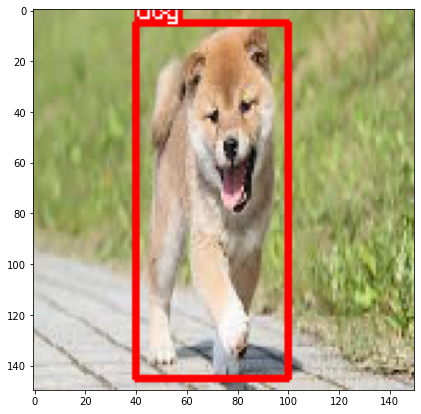

In [30]:
annotations = {'image': X[0], 'bboxes': [[40,5,100,145]], 'category_id': y[0]}
img = visualize(annotations,{0: 'dog', 1: 'cat'})

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


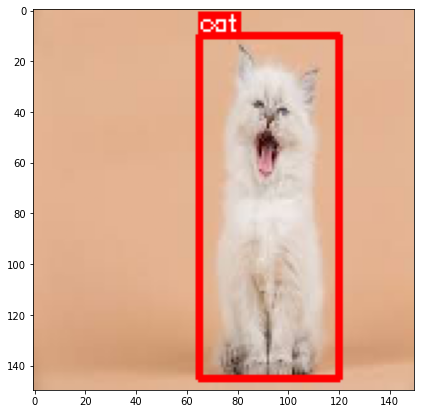

In [31]:
annotations = {'image': X[5], 'bboxes': [[65,10,120,145]], 'category_id': y[5]}
img = visualize(annotations,{0: 'dog', 1: 'cat'})

## 【問題4】物体検出データセットに対するデータ拡張

### データ拡張（Data Augmentation）を行ってください。前述のalbumentationsはバウンディングボックスを合わせての加工が可能です。

In [32]:
# ライブラリの読み込み
import albumentations as A

In [33]:
# albumentations用にピクセル数を画像に対する割合に変更
annotations = {'image': X[5],
               'bboxes': [[65/img_w,10/img_h,120/img_w,145/img_h]],
               'category_id': y[5]}

In [34]:
# データ拡張
# Compose:一連の画像操作をまとめて行う
aug = A.Compose([
    # RandomCrop:ランダムに切り取る
    A.RandomCrop(width=100, height=100),
    # RandomBrightnessContrast:ランダムに明るさとコントラストを変える
    A.RandomBrightnessContrast(p=0.2),],
    
    bbox_params=A.BboxParams(format='albumentations',label_fields=['category_id']))
# 
augmented = aug(**annotations)

In [35]:
# 拡張後も割合で帰ってくるので、描画用に元に戻す
augmented['bboxes'] = [[
    augmented['bboxes'][0][0]*augmented['image'].shape[0],
    augmented['bboxes'][0][1]*augmented['image'].shape[1],
    augmented['bboxes'][0][2]*augmented['image'].shape[0],
    augmented['bboxes'][0][3]*augmented['image'].shape[1]
]]

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


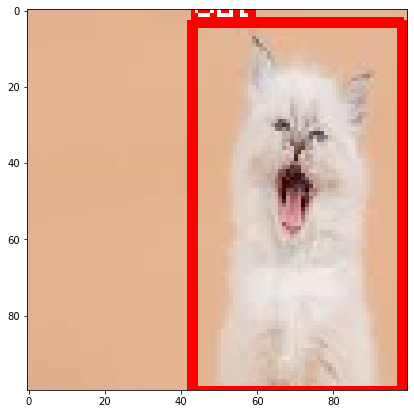

In [36]:
# 描画
visualize(augmented,{0: 'dog', 1: 'cat'})